<a href="https://colab.research.google.com/github/mishab3113/MyRef/blob/master/Time_Series_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dtw-python

In [ ]:
!pip install tslearn

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# dynamic time warping
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data
df= pd.read_csv('/content/drive/MyDrive/Time Series-POC/elementids_180.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9,10,11,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CATEGORY,VENDOR,ELEMENT,ID,CIRCUIT_ID,IF_TYPE,ADDON_CATEGORY,ADDON_CO_RT,ADDON_NTWK_LEVEL,ADDON_SUBTYPE,ADDON_TYPE,DAYS_TO_EXHAUST,END_DATE,TREND_TYPE,STATUS,ACTIONABLE,PROJECT_IDS,REPORT_DATE,PEAK_IN_RATE,PEAK_OUT_RATE,CAPACITY_BPS,Element_circuitID,Element_ID
0,3875,DSLAM,ADTRAN,ADSNALXAH01,2000,NaN,ATM,DSLAM,RT,ACCESS,DSLAM UPLINK,LOCAL PLNG,7.0,2021-08-28,EXHAUST DATE CALCULATED,High Cost,0.0,NaN,2021-03-19,3008000,957000,3046440,NaN,ADSNALXAH01_2000
1,3876,DSLAM,ADTRAN,ADSNALXAH01,2000,NaN,ATM,DSLAM,RT,ACCESS,DSLAM UPLINK,LOCAL PLNG,7.0,2021-08-28,EXHAUST DATE CALCULATED,High Cost,0.0,NaN,2021-03-20,2985000,865000,3046440,NaN,ADSNALXAH01_2000
2,3877,DSLAM,ADTRAN,ADSNALXAH01,2000,NaN,ATM,DSLAM,RT,ACCESS,DSLAM UPLINK,LOCAL PLNG,7.0,2021-08-28,EXHAUST DATE CALCULATED,High Cost,0.0,NaN,2021-03-21,2991000,979000,3046440,NaN,ADSNALXAH01_2000
3,3878,DSLAM,ADTRAN,ADSNALXAH01,2000,NaN,ATM,DSLAM,RT,ACCESS,DSLAM UPLINK,LOCAL PLNG,7.0,2021-08-28,EXHAUST DATE CALCULATED,High Cost,0.0,NaN,2021-03-22,2984000,715000,3046440,NaN,ADSNALXAH01_2000
4,3879,DSLAM,ADTRAN,ADSNALXAH01,2000,NaN,ATM,DSLAM,RT,ACCESS,DSLAM UPLINK,LOCAL PLNG,7.0,2021-08-28,EXHAUST DATE CALCULATED,High Cost,0.0,NaN,2021-03-23,2937000,621000,3046440,NaN,ADSNALXAH01_2000


In [ ]:
# taking particular columns only
df= df[[ 'REPORT_DATE','PEAK_IN_RATE','Element_circuitID']]

In [ ]:
df.shape

(140760, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140760 entries, 0 to 140759
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   REPORT_DATE        140760 non-null  object
 1   PEAK_IN_RATE       140760 non-null  int64 
 2   Element_circuitID  136080 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Getting elementids with exactly 1880 rows
element_ids= df['Element_circuitID'].value_counts()
element_ids_df= pd.DataFrame(element_ids)
element_ids_df_180= element_ids_df[element_ids_df['Element_circuitID']==180]
element_ids_df_180.head()

,Element_circuitID
LSV2-DSL-GW05.LSV2.QWEST.NET_10x10GigE to LSV2-AGW1 ae13; ETH10GBN-22671301; CORE#179548768; qip_prod; dslagw1,180
SPKNWA0124W-CORE-MOE_CF;DASACT;101/GE1/SPKNWA0124W/SPKOWA0300W;SPKOWA0300W-EDGE-CN1;PORT 6,180
LSV2-DSL-GW05.LSV2.QWEST.NET_10GigE to A7LSVGNVXB59W Port 2/1/1; ETH10GB-23815011; CORE#180485947; ECCKT=810/GE10/LSVGNVXBH75/LSVGNVXB59W 2/1/1; qip_prod,180
DESMIAEA08W-CORE-MOE_102/GE1/DESMIAEA08W/DESOIAEO; DSLAM DESOIAEO002;,180
LSV2-DSL-GW05.LSV2.QWEST.NET_10GigE to LSV2-AGW1; xe-2/2/1; ETH10GBN-22671301.03; CORE#181816348; qip_prod; dslagw1,180


In [ ]:
element_ids_180_list= element_ids_df_180.index.tolist()

In [ ]:
#creating a dataframe that contains elementid with 180 rows only
df_new= df[df['Element_circuitID'].isin(element_ids_180_list)]
df_new.head()

,REPORT_DATE,PEAK_IN_RATE,Element_circuitID
180,2021-03-19,13479563,AMBSPAABRLA_Calix C7 IMA Group ATM layer
181,2021-03-20,13489565,AMBSPAABRLA_Calix C7 IMA Group ATM layer
182,2021-03-21,13502048,AMBSPAABRLA_Calix C7 IMA Group ATM layer
183,2021-03-22,13526785,AMBSPAABRLA_Calix C7 IMA Group ATM layer
184,2021-03-23,13504975,AMBSPAABRLA_Calix C7 IMA Group ATM layer


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_new['PEAK_IN_RATE'] = scaler.fit_transform(np.array(df_new['PEAK_IN_RATE']).reshape(-1,1))

In [ ]:
# checking unique elementid count in newly created df
df_new['Element_circuitID'].nunique()

718

In [ ]:
df_new.isnull().sum()

REPORT_DATE          0
PEAK_IN_RATE         0
Element_circuitID    0
dtype: int64

In [ ]:
df_new['REPORT_DATE']= pd.to_datetime(df_new['REPORT_DATE'],format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new

,REPORT_DATE,PEAK_IN_RATE,Element_circuitID
180,2021-03-19,13479563,AMBSPAABRLA_Calix C7 IMA Group ATM layer
181,2021-03-20,13489565,AMBSPAABRLA_Calix C7 IMA Group ATM layer
182,2021-03-21,13502048,AMBSPAABRLA_Calix C7 IMA Group ATM layer
183,2021-03-22,13526785,AMBSPAABRLA_Calix C7 IMA Group ATM layer
184,2021-03-23,13504975,AMBSPAABRLA_Calix C7 IMA Group ATM layer
...,...,...,...
140755,2021-09-10,35755,NLRK-DSL-GW01.NLRK.QWEST.NET_16x10GigE to NLRK...
140756,2021-09-11,34025,NLRK-DSL-GW01.NLRK.QWEST.NET_16x10GigE to NLRK...
140757,2021-09-12,51734,NLRK-DSL-GW01.NLRK.QWEST.NET_16x10GigE to NLRK...
140758,2021-09-13,22066,NLRK-DSL-GW01.NLRK.QWEST.NET_16x10GigE to NLRK...


In [ ]:
#creating a list that contains dataframes corresponding to each elementid
#creating a list with elementid names as elements
ts_list=[]
name_series=[]
for ele_id in df_new['Element_circuitID'].unique():
    series= df_new[df_new['Element_circuitID']==ele_id]
    series= series.drop('Element_circuitID', axis=1)
    series.set_index("REPORT_DATE",inplace=True)
    series.sort_index(inplace=True)
    name_series.append(str(ele_id))
    ele_id=series
    ts_list.append(ele_id)

In [ ]:
len(ts_list)

718

In [ ]:
ts_list

[             PEAK_IN_RATE
 REPORT_DATE              
 2021-03-19       13479563
 2021-03-20       13489565
 2021-03-21       13502048
 2021-03-22       13526785
 2021-03-23       13504975
 ...                   ...
 2021-09-11       15324574
 2021-09-12       13060088
 2021-09-13       15689724
 2021-09-14       16485810
 2021-09-15       16460463
 
 [180 rows x 1 columns],              PEAK_IN_RATE
 REPORT_DATE              
 2021-03-19       47961000
 2021-03-20       23268000
 2021-03-21       31398000
 2021-03-22       32527000
 2021-03-23       44865000
 ...                   ...
 2021-09-10       58276000
 2021-09-11       22417000
 2021-09-12       20055000
 2021-09-13       58427000
 2021-09-14       43960000
 
 [180 rows x 1 columns],              PEAK_IN_RATE
 REPORT_DATE              
 2021-03-19       15930000
 2021-03-20       21519000
 2021-03-21       21799000
 2021-03-22       24367000
 2021-03-23       24653000
 ...                   ...
 2021-09-10       17114000
 20

In [ ]:
len(name_series)

718

In [ ]:
# checking whether every TS have same length or not
series_lengths = {len(series) for series in ts_list}
print(series_lengths)

{180}


In [ ]:
# Normalising peakinrate based on the corresponding elementid
from sklearn.preprocessing import MinMaxScaler
for i in range(len(ts_list)):
    scaler = MinMaxScaler()
    ts_list[i] = MinMaxScaler().fit_transform(ts_list[i])
    ts_list[i]= ts_list[i].reshape(len(ts_list[i]))

In [ ]:
print("max: "+str(max(ts_list[0]))+"\tmin: "+str(min(ts_list[0])))
print(ts_list[0][:5])

max: 1.0	min: 0.0
[0.54874563 0.54973502 0.55096984 0.55341681 0.55125938]


### Time Series Clustering

In [ ]:
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
import math
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
#pip install tslearn

In [ ]:
cluster_count = math.ceil(math.sqrt(len(ts_list))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

# Initializing timeseries kmeans clustering model with 'date time warping(dtw) as metric to calculate distance'
km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw",random_state=100)
#fitting model
labels = km.fit_predict(ts_list)

In [ ]:
cluster_count = math.ceil(math.sqrt(len(ts_list))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

# Initializing timeseries kmeans clustering model with 'date time warping(dtw) as metric to calculate distance'
km_eucl= TimeSeriesKMeans(n_clusters=cluster_count, metric="euclidean",random_state=100)
#fitting model
labels_eucl = km_eucl.fit_predict(ts_list)

In [ ]:
qq

NameError: ignored

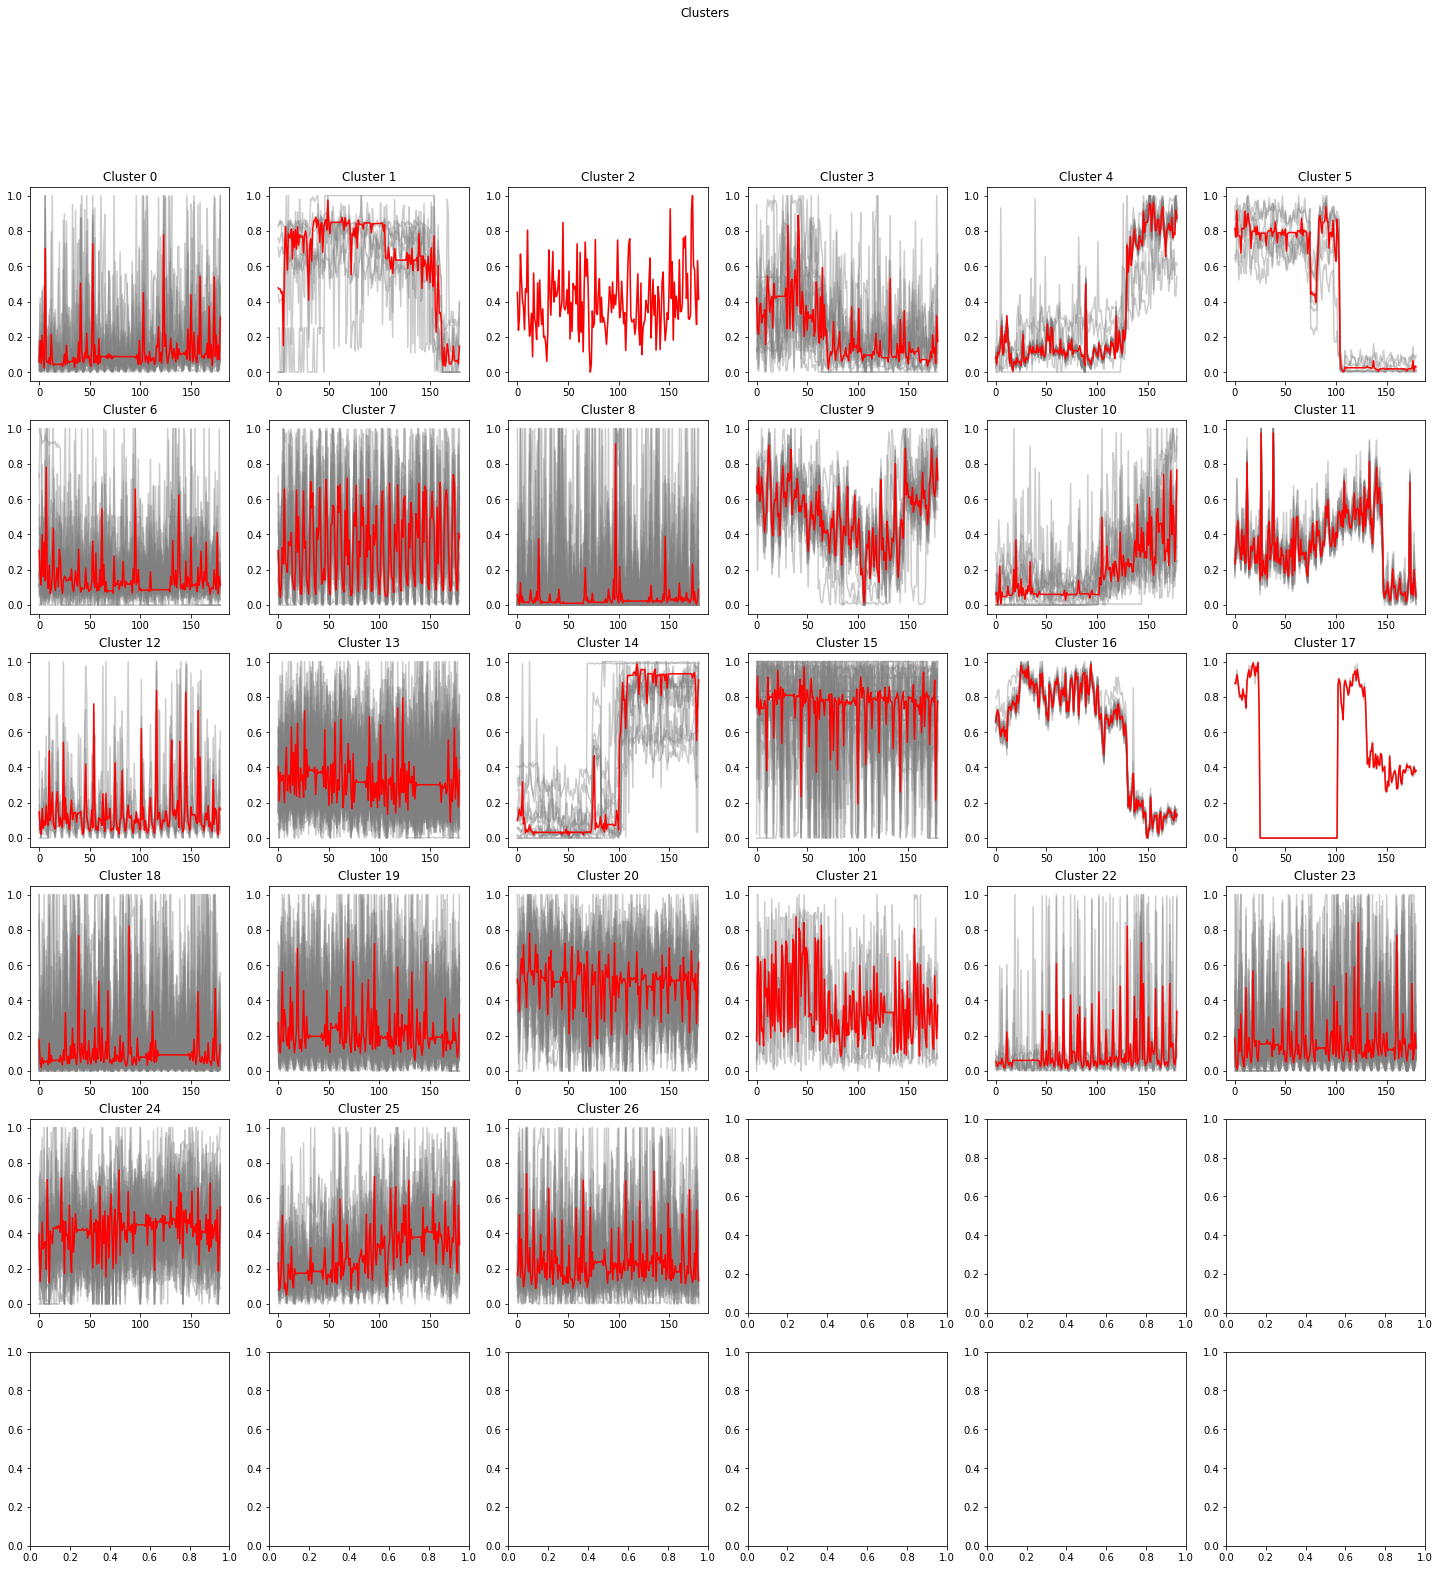

In [ ]:
#ploting each cluster using dtw_barycenter_averaging for understanding the shape/movement of the cluster

plot_count = math.ceil(math.sqrt(cluster_count))
a=math.ceil(math.sqrt(math.sqrt(len(ts_list))))
fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels_eucl):
    cluster = []
    for i in range(len(labels_eucl)):
            if(labels_eucl[i]==label):
                axs[row_i, column_j].plot(ts_list[i],c="gray",alpha=0.4)
                cluster.append(ts_list[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*a+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [ ]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels_eucl]
cluster_df_eu= pd.DataFrame(zip(name_series,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

In [ ]:
cluster_df_eu['Cluster'].value_counts()

Cluster 8     107
Cluster 18     82
Cluster 19     59
Cluster 13     50
Cluster 20     44
Cluster 23     38
Cluster 24     32
Cluster 6      30
Cluster 26     27
Cluster 15     27
Cluster 25     25
Cluster 7      24
Cluster 0      23
Cluster 4      21
Cluster 9      18
Cluster 11     16
Cluster 16     15
Cluster 3      14
Cluster 10     13
Cluster 14     13
Cluster 22      9
Cluster 1       8
Cluster 12      8
Cluster 5       7
Cluster 21      5
Cluster 17      2
Cluster 2       1
Name: Cluster, dtype: int64

In [ ]:
#ploting each cluster using average for understanding the shape/movement of the cluster
plot_count = math.ceil(math.sqrt(cluster_count))
a=math.ceil(math.sqrt(math.sqrt(len(ts_list))))
fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(ts_list[i],c="gray",alpha=0.4)
                cluster.append(ts_list[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*cluster_count+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [ ]:
#ploting each cluster using dtw_barycenter_averaging for understanding the shape/movement of the cluster

plot_count = math.ceil(math.sqrt(cluster_count))
a=math.ceil(math.sqrt(math.sqrt(len(ts_list))))
fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(ts_list[i],c="gray",alpha=0.4)
                cluster.append(ts_list[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*a+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [ ]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
cluster_df= pd.DataFrame(zip(name_series,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

In [ ]:
cluster_df['Cluster'].value_counts()

Cluster 12    58
Cluster 15    55
Cluster 23    52
Cluster 8     50
Cluster 25    47
Cluster 0     45
Cluster 3     41
Cluster 9     35
Cluster 11    34
Cluster 2     32
Cluster 21    30
Cluster 26    28
Cluster 7     28
Cluster 22    26
Cluster 17    23
Cluster 6     22
Cluster 1     18
Cluster 16    17
Cluster 19    15
Cluster 10    12
Cluster 20    11
Cluster 4     10
Cluster 14     8
Cluster 13     7
Cluster 24     7
Cluster 5      5
Cluster 18     2
Name: Cluster, dtype: int64

In [ ]:
qq

In [ ]:
# function to visualize different series in a particular cluster
def cluster(cluster_name):
    cluster= cluster_df[cluster_df['Cluster']==cluster_name]
    cluster_list= cluster.index.tolist()
    df_cluster= df_new[df_new['Element_circuitID'].isin(cluster_list)]
    for i in cluster_list:
        m= df_cluster[df_cluster['Element_circuitID']==i]
        g = sns.FacetGrid(m, col="Element_circuitID", col_wrap=4, height=2)
        g.map(sns.lineplot, "REPORT_DATE", "PEAK_IN_RATE", color=".3", ci=None)
        plt.show()
    
    df_cluster.pivot_table(index = "REPORT_DATE", columns = "Element_circuitID", values = "PEAK_IN_RATE").plot(figsize=(20,20))    

In [ ]:
cluster('Cluster 19')

In [ ]:
from fbprophet import Prophet

In [ ]:
#dataframe of annual US Public Holidays + 2017 Presidential Inauguration over training and forecasting periods 

ny = pd.DataFrame({'holiday': "New Year's Day", 'ds' : pd.to_datetime(['2021-01-01'])})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2021-01-18'])}) 
wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : pd.to_datetime(['2021-02-15'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime(['2021-05-30'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2021-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2021-09-07'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2021-10-12'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2021-11-11'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2021-11-26'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2021-12-25'])})
inaug = pd.DataFrame({'holiday': 'Inauguration Day', 'ds' : pd.to_datetime(['2021-01-20'])})

us_public_holidays = pd.concat([ny, mlk, wash, mem, ind, lab, col, vet, thanks, christ, inaug])

In [ ]:
def forecast(cluster_name):
    cluster= cluster_df[cluster_df['Cluster']==cluster_name]
    cluster_list= cluster.index.tolist()
    df= df_new.reset_index()
    df_cluster= df[df['Element_circuitID'].isin(cluster_list)]
    for i in df_cluster['Element_circuitID'].unique():
        subdf_cluster= df_cluster[df_cluster['Element_circuitID']==i]
        subdf_cluster= subdf_cluster[['PEAK_IN_RATE','REPORT_DATE']]
        subdf_cluster= subdf_cluster.rename(columns={'PEAK_IN_RATE':'y','REPORT_DATE':'ds'})
        train= subdf_cluster[subdf_cluster['ds']<='2021-08-31']
        test= subdf_cluster[subdf_cluster['ds']>'2021-08-31']
        #initializing prophet model
        m = Prophet(holidays=us_public_holidays) #confidence interval is 95%
        # fitting on train data
        m.fit(train)
        predictions= m.predict(subdf_cluster)
        fig= m.plot(predictions)
        plt.title('Forecasting with CI_'+str(i),size=18);

In [ ]:
cluster_10= forecast('Cluster 10')

In [ ]:
cluster_20= forecast('Cluster 20')

In [ ]:
cluster_4= forecast('Cluster 4')

In [ ]:
cluster_14= forecast('Cluster 14')

In [ ]:
cluster_24= forecast('Cluster 24')

In [ ]:
cluster_13= forecast('Cluster 13')

In [ ]:
cluster_5= forecast('Cluster 5')

In [ ]:
cluster('Cluster 5')

In [ ]:
cluster_18= forecast('Cluster 18')

In [ ]:
!pip install pycaret

In [ ]:
!pip install scikit-learn==0.23.2

In [ ]:
#pip install --upgrade plotly 

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_new['Month']= df_new.inde.dt.month
df_new['WeekDay']= df_new['REPORT_DATE'].dt.weekday
df_new.set_index('REPORT_DATE', drop=True, inplace=True)

In [ ]:
def forecast_anomaly(cluster_name):
    cluster= cluster_df[cluster_df['Cluster']==cluster_name]
    cluster_list= cluster.index.tolist()
    df_cluster= df_new[df_new['Element_circuitID'].isin(cluster_list)]
    for i in df_cluster['Element_circuitID'].unique():
      subdf_cluster= df_cluster[df_cluster['Element_circuitID']==i]
      subdf_cluster= subdf_cluster[['PEAK_IN_RATE','Month','WeekDay']]
      # create loa
      from pycaret.anomaly import setup 
      s= setup(subdf_cluster)
      from pycaret.anomaly import create_model 
      lof= create_model(model = 'lof', fraction = 0.02)
      # assign a model 
      from pycaret.anomaly import assign_model 
      lof_df = assign_model(lof)
      # generate predictions using trained model
      # from pycaret.anomaly import predict_model 
      # lof_predictions = predict_model(lof, data = subdf_cluster)
      print(lof_df[lof_df['Anomaly']==1])
      print(100*'-')
      #plotting
      import plotly.graph_objects as go
      fig = px.line(lof_df, x=lof_df.index, y="PEAK_IN_RATE",title=str(i)+ '_anomaly detection IOF')
      outlier_dates = lof_df[lof_df['Anomaly'] == 1].index
      y_values = [lof_df.loc[j]['PEAK_IN_RATE'] for j in outlier_dates]
      fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', name = 'Anomaly',marker=dict(color='red',size=10)))
      fig.show()


In [ ]:
# def forecast_anomaly(cluster_name):
#     cluster= cluster_df[cluster_df['Cluster']==cluster_name]
#     cluster_list= cluster.index.tolist()
#     df_cluster= df_new[df_new['Element_circuitID'].isin(cluster_list)]
#     for i in df_cluster['Element_circuitID'].unique():
#       subdf_cluster= df_cluster[df_cluster['Element_circuitID']==i]
#       subdf_cluster= subdf_cluster[['PEAK_IN_RATE','REPORT_DATE']]
#       # create loa
#       subdf_cluster['REPORT_DATE']= pd.to_datetime(subdf_cluster['REPORT_DATE'], format='%Y-%m-%d')
#       subdf_cluster['Month']= subdf_cluster['REPORT_DATE'].dt.month
#       subdf_cluster['WeekDay']= subdf_cluster['REPORT_DATE'].dt.weekday
#       subdf_cluster= subdf_cluster[['PEAK_IN_RATE','Month', 'WeekDay']]
      
#       #plotting
#       lof_predictions.set_index(lof_predictions['REPORT_DATE'],inplace=True)
#       fig = px.line(lof_predictions, x=lof_predictions['REPORT_DATE'].index, y="PEAK_IN_RATE",title=str(i)+ '_anomaly detection IOF')
#       outlier_dates = lof_predictions[lof_predictions['Anomaly'] == 1].index
#       y_values = [lof_predictions.loc[j]['PEAK_IN_RATE'] for j in outlier_dates]
#       fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', name = 'Anomaly',marker=dict(color='red',size=10)))
#       fig.show()


In [ ]:
forecast_anomaly('Cluster 19')

In [ ]:
#!pip install u8darts[all]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [ ]:
cluster('Cluster 1')

In [ ]:
cluster14= cluster_df[cluster_df['Cluster']=='Cluster 1']
cluster_list14= cluster14.index.tolist()
df_cluster14= df_new[df_new['Element_circuitID'].isin(cluster_list14)]

In [ ]:
df_cluster14['Element_circuitID'].value_counts()

In [ ]:
df_cluster14.to_csv('cluster1.csv')

In [ ]:
for cluster_name in cluster_df_eu['Cluster'].unique():
  cluster= cluster_df_eu[cluster_df_eu['Cluster']==cluster_name]
  cluster_list= cluster.index.tolist()
  df_cluster= df_new[df_new['Element_circuitID'].isin(cluster_list)]
  df_cluster.to_csv('/content/drive/MyDrive/cluster_eucledean/'+str(cluster_name)+'_eucl.csv')

In [ ]:
cluster_df_eu['Cluster'].value_counts()

Cluster 8     107
Cluster 18     82
Cluster 19     59
Cluster 13     50
Cluster 20     44
Cluster 23     38
Cluster 24     32
Cluster 6      30
Cluster 26     27
Cluster 15     27
Cluster 25     25
Cluster 7      24
Cluster 0      23
Cluster 4      21
Cluster 9      18
Cluster 11     16
Cluster 16     15
Cluster 3      14
Cluster 10     13
Cluster 14     13
Cluster 22      9
Cluster 1       8
Cluster 12      8
Cluster 5       7
Cluster 21      5
Cluster 17      2
Cluster 2       1
Name: Cluster, dtype: int64

In [ ]:
/content/drive/MyDrive/cluster_dtw

In [ ]:
/content/drive/MyDrive/cluster_eucledean